In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
hr = pd.read_csv('/content/HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Рассчет основных статистик

In [ ]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


# Расчет корреляции и её визуализация

In [ ]:
hr.corr()

<ipython-input-5-764b01c79bed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<ipython-input-6-093b66b5a767>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat = sns.heatmap(hr.corr(), annot = True)


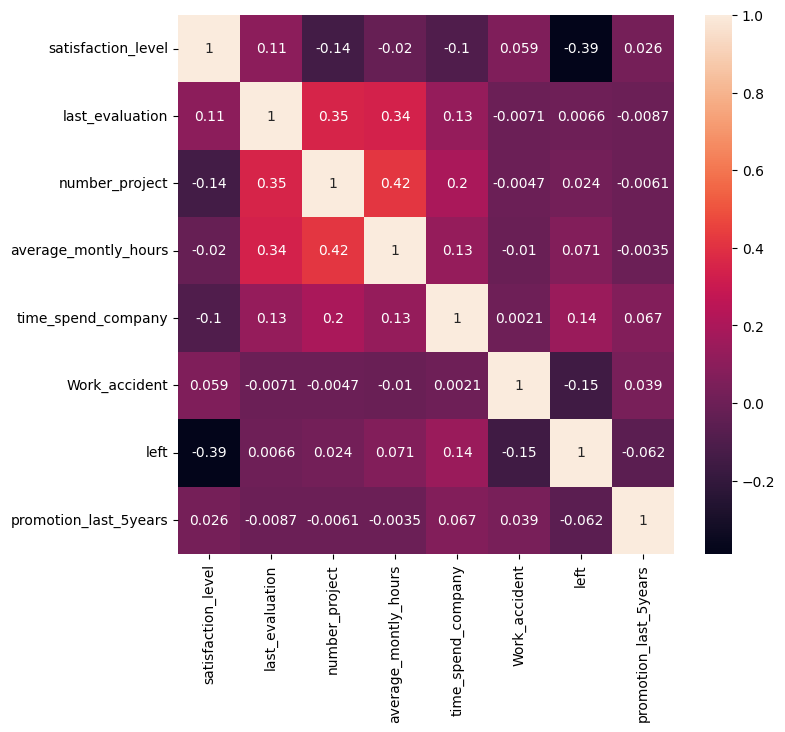

In [ ]:
fig, heat = plt.subplots(figsize = (8,7))

heat = sns.heatmap(hr.corr(), annot = True)

Из вызуализации видно, что двумя самыми скоррелированными переменными являются: количество проектов и среднее количество часов на работе в месяц. Двумя наименее скоррелированными переменными являются: количество инцидентов на работе и время проведенное в компании.

# Расчет количества сотрудников в каждом департаменте

In [ ]:
hr.groupby('department')['salary'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

# Распределение сотрудников по зарплатам

[Text(0.5, 0, 'Salary'),
 Text(0, 0.5, 'The number of employees'),
 Text(0.5, 1.0, 'Distribution of employees by salary')]

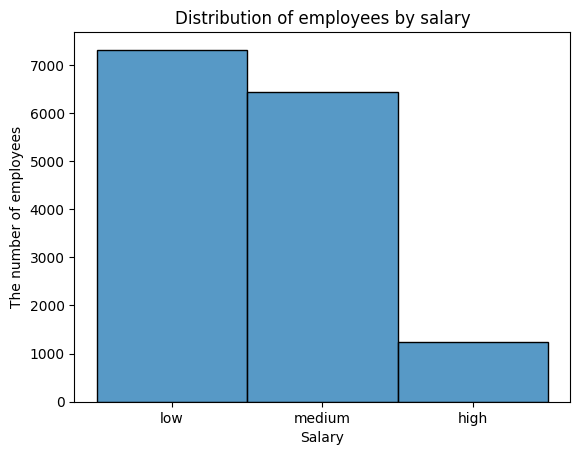

In [ ]:
ax = sns.histplot(hr['salary'])
ax.set(xlabel='Salary', ylabel='The number of employees', title='Distribution of employees by salary')

# Распределение сотрудников по зарплатам в каждом департаменте по отдельности

[Text(0.5, 0, 'Salary'),
 Text(0, 0.5, 'The number of employees'),
 Text(0.5, 1.0, 'marketing')]

<Figure size 640x480 with 0 Axes>

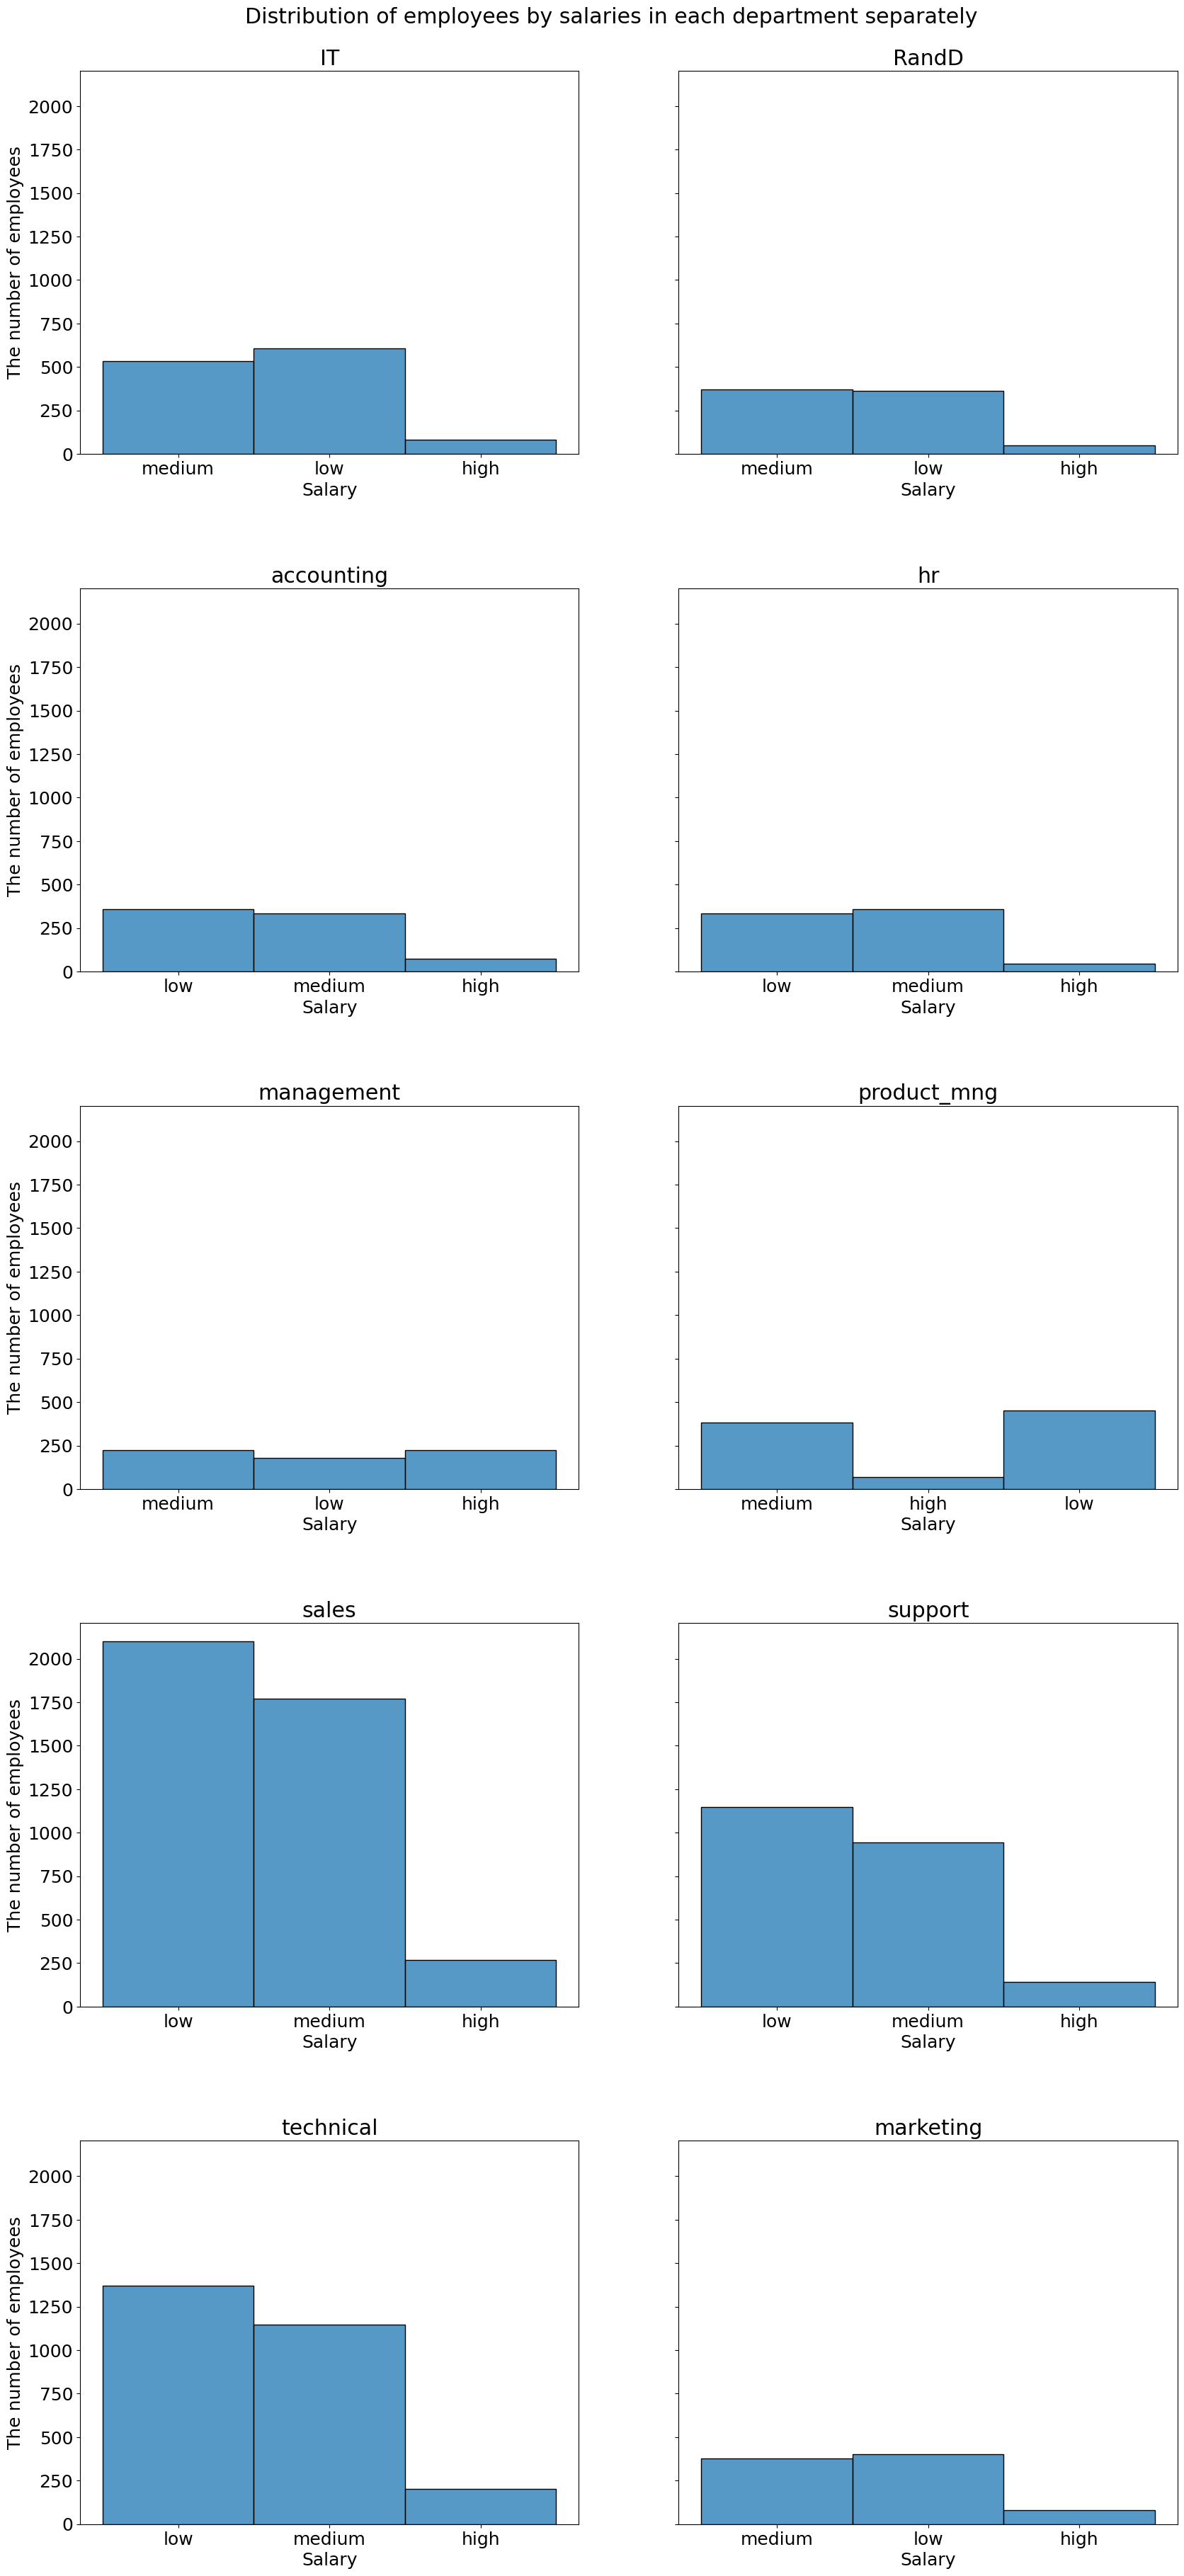

In [ ]:
plt.rc('font', size = 18)
plt.subplots_adjust(hspace = 0.8)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize=(20, 45), sharey=True)
plt.subplots_adjust(hspace = 0.35)
fig.suptitle('Distribution of employees by salaries in each department separately', y = 0.9)

sns.histplot(data = hr[hr['department'] == 'IT'], x = 'salary', ax=ax1[0], )
ax1[0].set(xlabel='Salary', ylabel='The number of employees', title='IT')

sns.histplot(data = hr[hr['department'] == 'RandD'], x = 'salary', ax=ax1[1])
ax1[1].set(xlabel='Salary', ylabel='The number of employees', title='RandD')

sns.histplot(data = hr[hr['department'] == 'accounting'], x = 'salary', ax=ax2[0])
ax2[0].set(xlabel='Salary', ylabel='The number of employees', title='accounting')

sns.histplot(data = hr[hr['department'] == 'hr'], x = 'salary', ax=ax2[1])
ax2[1].set(xlabel='Salary', ylabel='The number of employees', title='hr')

sns.histplot(data = hr[hr['department'] == 'management'], x = 'salary', ax=ax3[0])
ax3[0].set(xlabel='Salary', ylabel='The number of employees', title='management')

sns.histplot(data = hr[hr['department'] == 'product_mng'], x = 'salary', ax=ax3[1])
ax3[1].set(xlabel='Salary', ylabel='The number of employees', title='product_mng')

sns.histplot(data = hr[hr['department'] == 'sales'], x = 'salary', ax=ax4[0])
ax4[0].set(xlabel='Salary', ylabel='The number of employees', title='sales')

sns.histplot(data = hr[hr['department'] == 'support'], x = 'salary', ax=ax4[1])
ax4[1].set(xlabel='Salary', ylabel='The number of employees', title='support')

sns.histplot(data = hr[hr['department'] == 'technical'], x = 'salary', ax=ax5[0])
ax5[0].set(xlabel='Salary', ylabel='The number of employees', title='technical')

sns.histplot(data = hr[hr['department'] == 'marketing'], x = 'salary', ax=ax5[1])
ax5[1].set(xlabel='Salary', ylabel='The number of employees', title='marketing')

# Проводят ли сотрудники с высоким окладом больше времени на работе, чем сотрудники с низким

In [ ]:
high_salary = hr[hr['salary'] == 'high']
high_salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high
...,...,...,...,...,...,...,...,...,...,...
14829,0.45,0.57,2,148,3,0,1,0,marketing,high
14868,0.43,0.55,2,130,3,0,1,0,support,high
14902,0.45,0.46,2,159,3,0,1,0,hr,high
14941,0.43,0.49,2,131,3,0,1,0,RandD,high


In [ ]:
low_salary = hr[hr['salary'] == 'low']
low_salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Напишем функцию для проверки на нормальность распределения на основе критерия Шапиро-Уилка.
# Возьмём стандартный p-value = 0.05

def check_normality(data):

    stat, p = stats.shapiro(data)

    if p < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
check_normality(high_salary['average_montly_hours'])

Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
check_normality(low_salary['average_montly_hours'])

Отклоняем нулевую гипотезу >> Данные распределены не нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Используем тест Левена, это позволит понять существует ли разница между дисперсиями у выборок.
# В качестве Н:0 преположим, что разницы между ними нет.

stat, p = stats.levene(high_salary['average_montly_hours'], low_salary['average_montly_hours'], center = 'median')

if p < 0.05:
 print('Дисперсии различаются')
else:
  print('Значимых различий между дисперсиями нет')

Дисперсии различаются


In [ ]:
stat, p = stats.levene(high_salary['average_montly_hours'], low_salary['average_montly_hours'], center = 'mean')

if p < 0.05:
 print('Дисперсии различаются')
else:
  print('Значимых различий между дисперсиями нет')

Дисперсии различаются


In [ ]:
# Для проверки используем критерий Манна-Уитни.

stat, p = stats.mannwhitneyu(high_salary['average_montly_hours'], low_salary['average_montly_hours'])

if p < 0.05:
 print('Выборки различаются между собой')
else:
  print('Значимых различий между выборками нет')

Значимых различий между выборками нет


In [ ]:
# Также можно использовать Т-тест с поправкой Уэлча, который невелирует наличие разницы между дисперсиями выборок.

stat, p = stats.ttest_ind (high_salary['average_montly_hours'], low_salary['average_montly_hours'],  equal_var = False )

if p < 0.05:
 print('Выборки различаются между собой')
else:
  print('Значимых различий между выборками нет')

Значимых различий между выборками нет


In [ ]:
hr_filt = hr.loc[(hr['salary'] == 'low') | (hr['salary'] == 'high')]
hr_filt

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<Axes: ylabel='average_montly_hours'>

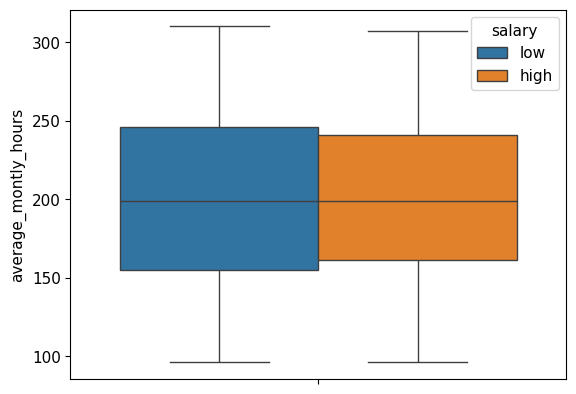

In [ ]:
# Проверим утверждения теста на графике.

plt.rc('font', size = 11)
sns.boxplot(data = hr_filt, y = hr['average_montly_hours'], hue = hr_filt['salary'])

На графике видно, что дисперсии у выборок действительно отличаются, однако, медиана находится на одном уровне и, в целом, распределения являются достаточно похожими. На основании имеющихся данных делаем окончательный вывод, что разницы между средним временем на работе и уровнем зарплаты (высокая или низкая) нет.

# Рассчет показателей среди уволившихся и работающих сотрудников

In [ ]:
# Доля повышений среди оставшихся и уволившихся сотрудников.

hr.groupby('left').agg({'promotion_last_5years' : 'mean'})

,promotion_last_5years
left,
0,0.026251
1,0.005321


In [ ]:
# Cредняя степень удовлетворенности.

hr.groupby('left').agg({'satisfaction_level' : 'mean'})

,satisfaction_level
left,
0,0.666810
1,0.440098


In [ ]:
# Среднее количество проектов.

hr.groupby('left').agg({'number_project' : 'mean'})

,number_project
left,
0,3.786664
1,3.855503


# Попытка предсказать уволится ли сотрудник на основании имеющи

In [ ]:
hr_for_predict = hr.drop(columns = ['salary', 'department'])
hr_for_predict

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = hr_for_predict.drop(columns = 'left')
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [ ]:
y = hr_for_predict['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.7528

Точность прогноза составляет 75,28%